# Problem Statement

Goal It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221

You can see an example submission file (sample_submission.csv)

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

# Read Dataset

In [2]:
trd = pd.read_csv(r"C:\Users\hp\Downloads\training_set.csv")
trd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
tsd = pd.read_csv(r"C:\Users\hp\Downloads\testing_set (1).csv")
tsd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Profile

In [4]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
trd.shape,tsd.shape

((1460, 81), (1459, 80))

# Missing Data Treatment

In [7]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
tsd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [9]:
trd.Alley = trd.Alley.fillna('No alley access')
trd.BsmtQual = trd.BsmtQual.fillna('No Basement')
trd.BsmtCond = trd.BsmtCond.fillna('No Basement')
trd.BsmtExposure = trd.BsmtExposure.fillna('No Basement')
trd.BsmtFinType1 = trd.BsmtFinType1.fillna('No Basement')
trd.BsmtFinType2 = trd.BsmtFinType2.fillna('No Basement')
trd.FireplaceQu = trd.FireplaceQu.fillna('No Fireplace')
trd.GarageType = trd.GarageType.fillna('No Garage')
trd.GarageFinish = trd.GarageFinish.fillna('No Garage')
trd.GarageQual = trd.GarageQual.fillna('No Garage')
trd.GarageCond = trd.GarageCond.fillna('No Garage')
trd.PoolQC = trd.PoolQC.fillna('No Pool')
trd.Fence = trd.Fence.fillna('No Fence')
trd.MiscFeature = trd.MiscFeature.fillna('None')

In [10]:
tsd.Alley = tsd.Alley.fillna('No alley access')
tsd.BsmtQual = tsd.BsmtQual.fillna('No Basement')
tsd.BsmtCond = tsd.BsmtCond.fillna('No Basement')
tsd.BsmtExposure = tsd.BsmtExposure.fillna('No Basement')
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna('No Basement')
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna('No Basement')
tsd.FireplaceQu = tsd.FireplaceQu.fillna('No Fireplace')
tsd.GarageType = tsd.GarageType.fillna('No Garage')
tsd.GarageFinish = tsd.GarageFinish.fillna('No Garage')
tsd.GarageQual = tsd.GarageQual.fillna('No Garage')
tsd.GarageCond = tsd.GarageCond.fillna('No Garage')
tsd.PoolQC = tsd.PoolQC.fillna('No Pool')
tsd.Fence = tsd.Fence.fillna('No Fence')
tsd.MiscFeature = tsd.MiscFeature.fillna('None')

In [11]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
trd[cat]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [17]:
trd[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [18]:
trd[con].nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [19]:
trd[con].nunique().sort_values().index[0:19]

Index(['BsmtHalfBath', 'HalfBath', 'FullBath', 'BsmtFullBath', 'Fireplaces',
       'KitchenAbvGr', 'GarageCars', 'YrSold', 'BedroomAbvGr', 'PoolArea',
       'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'MoSold', 'MSSubClass',
       '3SsnPorch', 'MiscVal', 'LowQualFinSF', 'YearRemodAdd'],
      dtype='object')

In [20]:
Q = list(trd[con].nunique().sort_values().index[0:19])
# Q

In [21]:
for i in Q:
    cat.append(i)
    con.remove(i)

In [22]:
trd[cat].shape

(1460, 62)

In [23]:
trd[con].shape

(1460, 19)

In [24]:
con.remove('SalePrice')

In [25]:
con

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [26]:
trd[con].shape

(1460, 18)

In [27]:
trd[Q]

,BsmtHalfBath,HalfBath,FullBath,BsmtFullBath,Fireplaces,KitchenAbvGr,GarageCars,YrSold,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass,3SsnPorch,MiscVal,LowQualFinSF,YearRemodAdd
0,0,1,2,1,0,1,2,2008,3,0,5,7,8,2,60,0,0,0,2003
1,1,0,2,0,1,1,2,2007,3,0,8,6,6,5,20,0,0,0,1976
2,0,1,2,1,1,1,2,2008,3,0,5,7,6,9,60,0,0,0,2002
3,0,0,1,1,1,1,3,2006,3,0,5,7,7,2,70,0,0,0,1970
4,0,1,2,1,1,1,3,2008,4,0,5,8,9,12,60,0,0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,2,0,1,1,2,2007,3,0,5,6,7,8,60,0,0,0,2000
1456,0,0,2,1,2,1,2,2010,3,0,6,6,7,2,20,0,0,0,1988
1457,0,0,2,0,2,1,1,2010,4,0,9,7,9,5,70,0,2500,0,2006
1458,0,0,1,1,0,1,1,2010,2,0,6,5,5,4,20,0,0,0,1996


In [28]:
x = trd["MSZoning"].mode()[0]
trd["MSZoning"] = trd['MSZoning'].fillna(x)

In [29]:
trd.MSZoning.isna().sum()

0

In [30]:
for i in cat:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
for i in con:
    x = trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [31]:
# cat

In [32]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [33]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [34]:
trd[cat].isna().sum()

MSZoning        0
Street          0
Alley           0
LotShape        0
LandContour     0
               ..
MSSubClass      0
3SsnPorch       0
MiscVal         0
LowQualFinSF    0
YearRemodAdd    0
Length: 62, dtype: int64

# outliers

In [35]:
tsd[con]

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,80.0,11622,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,1961.000000,730.0,140,0,0,120
1,1462,81.0,14267,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,1958.000000,312.0,393,36,0,0
2,1463,74.0,13830,1997,0.0,791.0,0.0,137.0,928.0,928,701,1629,1997.000000,482.0,212,34,0,0
3,1464,78.0,9978,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,1998.000000,470.0,360,36,0,0
4,1465,43.0,5005,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,1992.000000,506.0,0,82,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,1970,0.0,0.0,0.0,546.0,546.0,546,546,1092,1978.506164,0.0,0,0,0,0
1455,2916,21.0,1894,1970,0.0,252.0,0.0,294.0,546.0,546,546,1092,1970.000000,286.0,0,24,0,0
1456,2917,160.0,20000,1960,0.0,1224.0,0.0,0.0,1224.0,1224,0,1224,1960.000000,576.0,474,0,0,0
1457,2918,62.0,10441,1992,0.0,337.0,0.0,575.0,912.0,970,0,970,1978.506164,0.0,80,32,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(tsd[con]),columns=con)
X1

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-1.730864,0.544280,0.363929,-0.340945,-0.570280,0.063288,0.517372,-0.650639,-0.370826,-0.654561,-0.775254,-1.215588,-0.652105,1.185944,0.366678,-0.701628,-0.360738,1.818960
1,-1.728490,0.592916,0.897861,-0.439695,0.041100,1.063385,-0.297879,-0.339398,0.639127,0.433298,-0.775254,-0.323539,-0.768809,-0.741213,2.347867,-0.178826,-0.360738,-0.301543
2,-1.726115,0.252467,0.809646,0.844059,-0.570280,0.773247,-0.297879,-0.955014,-0.266893,-0.574165,0.891944,0.294508,0.748333,0.042559,0.930495,-0.207871,-0.360738,-0.301543
3,-1.723741,0.447009,0.032064,0.876976,-0.457062,0.357822,-0.297879,-0.527058,-0.271412,-0.579190,0.837243,0.243004,0.787234,-0.012766,2.089451,-0.178826,-0.360738,-0.301543
4,-1.721367,-1.255236,-0.971808,0.679475,-0.570280,-0.387305,-0.297879,1.058896,0.528416,0.310192,-0.775254,-0.424487,0.553827,0.153209,-0.729632,0.489198,-0.360738,2.243060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,-2.325218,-1.591330,-0.044694,-0.570280,-0.965383,-0.297879,-0.019004,-1.129985,-1.533893,0.523306,-0.811797,0.028903,-2.179666,-0.729632,-0.701628,-0.360738,-0.301543
1455,1.723741,-2.325218,-1.599808,-0.044694,-0.570280,-0.411483,-0.297879,-0.595714,-1.129985,-1.533893,0.523306,-0.811797,-0.301996,-0.861084,-0.729632,-0.353093,-0.360738,-0.301543
1456,1.726115,4.435126,2.055150,-0.373861,-0.570280,1.724988,-0.297879,-1.268543,0.401889,0.169499,-0.775254,-0.539856,-0.691006,0.475939,2.982161,-0.701628,-0.360738,-0.301543
1457,1.728490,-0.331160,0.125527,0.679475,-0.570280,-0.224652,-0.297879,0.047364,-0.303044,-0.468645,-0.775254,-1.063136,0.028903,-2.179666,-0.103169,-0.236915,-0.360738,-0.301543


In [37]:
X1[(X1.TotalBsmtSF>3) | (X1.TotalBsmtSF<-3)]

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
19,-1.685752,2.003348,0.904522,1.041560,5.628435,2.052492,-0.297879,2.102468,4.066639,3.867718,-0.775254,2.492697,0.981739,2.237121,0.993141,1.476713,-0.360738,-0.301543
203,-1.248881,1.760170,0.781990,1.173227,2.101677,4.063676,-0.297879,-0.485865,3.578608,3.812446,-0.775254,2.447373,1.137343,1.333477,2.089451,0.024486,-0.360738,-0.301543
211,-1.229887,2.003348,1.101138,1.041560,3.528231,3.369103,-0.297879,-0.170047,3.176435,3.254698,-0.775254,1.990018,0.981739,1.905170,-0.729632,0.982956,-0.360738,-0.301543
217,-1.215641,1.516992,1.012722,1.074476,3.562196,3.751558,-0.297879,-0.476710,3.266811,3.355193,-0.775254,2.072424,1.020640,2.195627,1.040126,2.711106,-0.360738,-0.301543
245,-1.149161,0.787458,0.264208,1.107393,0.550583,3.777934,-0.297879,-0.581983,3.189991,3.350169,-0.775254,2.068304,1.059541,1.485621,-0.181477,2.580405,-0.360738,-0.301543
507,-0.527094,1.760170,0.781990,1.173227,2.565873,2.832787,2.504545,-0.822279,3.099615,3.284847,-0.775254,2.014740,1.137343,0.817110,2.073790,0.431109,-0.360738,-0.301543
514,-0.510474,1.808805,0.585576,1.041560,3.279150,3.995537,-0.297879,-0.632331,3.363965,3.299921,-0.775254,2.027101,0.981739,1.457959,0.476309,0.242320,-0.360738,3.515362
803,0.175698,-0.817516,8.509564,1.140310,3.448978,1.454632,-0.297879,2.299282,3.646390,2.968287,-0.775254,1.755160,1.059541,2.937905,-0.729632,1.258879,-0.360738,5.388472
832,0.244553,1.857441,0.821960,1.173227,2.011102,3.017420,-0.297879,0.424972,3.402375,3.505936,-0.775254,2.196034,1.137343,2.117250,0.288370,-0.295004,-0.360738,-0.301543
916,0.443994,1.225178,1.606607,0.317391,-0.570280,2.621778,4.395473,-1.268543,3.196769,3.367755,-0.775254,2.082725,0.125916,0.936981,1.353357,-0.701628,-0.360738,-0.301543


In [38]:
out = X1[(X1.TotalBsmtSF>3) | (X1.TotalBsmtSF<-3)].index

In [39]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3) | (X1[i]<-3)].index)

In [40]:
# out

In [41]:
from numpy import unique
outliers = list(unique(out))

In [42]:
# outliers

In [43]:
len(out),len(outliers)

(325, 241)

In [44]:
trd = trd.drop(index=outliers,axis=0)

In [45]:
trd.shape

(1219, 81)

In [46]:
trd.index = range(0,1219,1)

In [47]:
trd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,10,2009,WD,Normal,185000
1215,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1216,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1217,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


# EDA

In [48]:
trd.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.012962,-0.016081,-0.017637,-0.049689,0.023623,-0.032406,-0.027087,-0.070226,-0.013358,...,-0.030130,-0.016213,0.010135,-0.045488,-0.001407,0.045698,-0.004869,0.039819,0.004859,-0.022158
MSSubClass,-0.012962,1.000000,-0.367322,-0.128044,0.034530,-0.067728,0.016117,0.021353,0.032359,-0.077559,...,-0.004887,-0.020155,-0.013865,-0.046236,-0.033008,0.003630,-0.002997,-0.005965,-0.018478,-0.079018
LotFrontage,-0.016081,-0.367322,1.000000,0.266835,0.238424,-0.054669,0.151811,0.103055,0.165820,0.157962,...,0.089598,0.143196,0.007180,0.074340,0.028847,0.116576,0.003710,0.021239,0.006176,0.362390
LotArea,-0.017637,-0.128044,0.266835,1.000000,0.091001,-0.005644,0.024528,0.030914,0.119185,0.195446,...,0.213027,0.105941,-0.013456,0.024677,0.061678,0.050917,0.049923,0.005361,-0.030195,0.262794
OverallQual,-0.049689,0.034530,0.238424,0.091001,1.000000,-0.103666,0.586593,0.554557,0.415607,0.249184,...,0.233140,0.315981,-0.111165,0.032709,0.073356,0.053995,-0.028041,0.096742,-0.016556,0.798373
OverallCond,0.023623,-0.067728,-0.054669,-0.005644,-0.103666,1.000000,-0.360556,0.071449,-0.140127,-0.043547,...,-0.017535,-0.051055,0.072141,0.032777,0.035339,-0.001644,0.062247,-0.000938,0.035291,-0.098845
YearBuilt,-0.032406,0.016117,0.151811,0.024528,0.586593,-0.360556,1.000000,0.598077,0.321004,0.262244,...,0.231796,0.221770,-0.406722,0.031268,-0.039980,-0.008620,-0.027538,0.045137,-0.013013,0.543267
YearRemodAdd,-0.027087,0.021353,0.103055,0.030914,0.554557,0.071449,0.598077,1.000000,0.188598,0.137307,...,0.189875,0.253630,-0.186338,0.049278,-0.033405,0.000464,-0.011679,0.050917,0.023136,0.512466
MasVnrArea,-0.070226,0.032359,0.165820,0.119185,0.415607,-0.140127,0.321004,0.188598,1.000000,0.262421,...,0.130797,0.122043,-0.111949,0.023216,0.081166,-0.017256,-0.030249,0.022280,0.000352,0.494979
BsmtFinSF1,-0.013358,-0.077559,0.157962,0.195446,0.249184,-0.043547,0.262244,0.137307,0.262421,1.000000,...,0.206450,0.114152,-0.114826,0.024518,0.072667,0.059193,0.007630,0.014991,0.013135,0.433311


In [49]:
Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
imp_cons = list(Q[(Q.SalePrice>0.1) | (Q.SalePrice<-1)][Q.SalePrice!=1].index)

In [50]:
imp_cons

['ScreenPorch',
 'PoolArea',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotArea',
 'HalfBath',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'LotFrontage',
 'BsmtFinSF1',
 'Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FullBath',
 '1stFlrSF',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [51]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'BsmtFullBath',
 'Fireplaces',
 'KitchenAbvGr',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass',
 '3SsnPorch',
 'MiscVal',
 'LowQualFinSF',
 'YearRemodAdd']

In [52]:
len(cat)

62

In [53]:
len(imp_cons)

25

# Data Preparation

In [54]:
trd[con].head()

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1,65.0,8450,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0
1,2,80.0,9600,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0
2,3,68.0,11250,2001,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0
3,4,60.0,9550,1915,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0
4,5,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0


In [55]:
trd[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass,3SsnPorch,MiscVal,LowQualFinSF,YearRemodAdd
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,5,7,8,2,60,0,0,0,2003
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,8,6,6,5,20,0,0,0,1976
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,5,7,6,9,60,0,0,0,2002
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,5,7,7,2,70,0,0,0,1970
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,5,8,9,12,60,0,0,0,2000


In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)
X2 = pd.get_dummies(trd[cat])
Xnew = X1.join(X2)

# testing dataset
X11 = pd.DataFrame(ss.transform(tsd[con]),columns=con)
X21 = pd.get_dummies(tsd[cat])
Xnew_test = X11.join(X21)

In [57]:
Xnew

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.726032,-0.229581,-0.224729,1.056532,0.514684,0.598431,-0.298054,-0.931017,-0.464259,-0.808747,...,0,0,0,1,0,0,0,0,1,0
1,-1.723650,0.487115,-0.091513,0.158012,-0.568639,1.218404,-0.298054,-0.626346,0.496495,0.268426,...,0,0,0,1,0,0,0,0,1,0
2,-1.721268,-0.086242,0.099623,0.989975,0.326761,0.096982,-0.298054,-0.285297,-0.312810,-0.638947,...,0,0,0,1,0,0,0,0,1,0
3,-1.718885,-0.468480,-0.097305,-1.871979,-0.568639,-0.518433,-0.298054,-0.044289,-0.700897,-0.530168,...,0,0,0,1,1,0,0,0,0,0
4,-1.716503,0.678234,0.448302,0.956697,1.365866,0.482186,-0.298054,-0.157972,0.219628,-0.041991,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1.737565,-0.372921,-0.334777,1.089811,-0.568639,-0.076246,-0.298054,0.571873,0.399473,0.159647,...,0,0,0,1,0,0,0,0,1,0
1215,1.739947,-0.372921,-0.286472,0.923418,-0.568639,-1.010764,-0.298054,0.894733,-0.234719,-0.551393,...,0,0,0,1,0,0,0,0,1,0
1216,1.744712,-0.181802,-0.156152,-1.006737,-0.568639,-0.383953,-0.298054,0.721935,0.236192,0.072094,...,0,0,0,1,0,0,0,0,1,0
1217,1.747094,-0.086242,-0.077960,-0.707230,-0.568639,-0.899078,5.928239,-1.272066,0.061080,-0.219751,...,0,0,0,1,0,0,0,0,1,0


In [58]:
Xnew_test

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.751858,0.487115,0.142716,-0.341166,-0.568639,0.055954,0.573264,-0.658177,-0.402732,-0.702622,...,0,0,0,1,0,0,0,0,1,0
1,1.754240,0.534894,0.449113,-0.441002,0.028294,1.093042,-0.298054,-0.348959,0.655043,0.446186,...,0,0,0,1,0,0,0,0,1,0
2,1.756622,0.200436,0.398491,0.856861,-0.568639,0.792173,-0.298054,-0.960574,-0.293879,-0.617721,...,0,0,0,1,0,0,0,0,1,0
3,1.759004,0.391555,-0.047725,0.890140,-0.458096,0.361382,-0.298054,-0.535400,-0.298611,-0.623028,...,0,0,0,1,0,0,0,0,1,0
4,1.761386,-1.280736,-0.623798,0.690468,-0.568639,-0.411305,-0.298054,1.040248,0.539090,0.316182,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.215455,-2.331890,-0.979312,-0.041660,-0.568639,-1.010764,-0.298054,-0.030647,-1.197839,-1.631219,...,0,0,0,1,0,0,0,0,1,0
1455,5.217837,-2.331890,-0.984177,-0.041660,-0.568639,-0.436377,-0.298054,-0.603610,-1.197839,-1.631219,...,0,0,0,1,1,0,0,0,0,0
1456,5.220219,4.309493,1.113225,-0.374445,-0.568639,1.779115,-0.298054,-1.272066,0.406572,0.167607,...,0,0,0,1,1,0,0,0,0,0
1457,5.222601,-0.372921,0.005909,0.690468,-0.568639,-0.242636,-0.298054,0.035289,-0.331741,-0.506290,...,0,0,0,1,0,0,0,0,1,0


In [59]:
X21.columns

Index(['BsmtHalfBath', 'HalfBath', 'FullBath', 'BsmtFullBath', 'Fireplaces',
       'KitchenAbvGr', 'GarageCars', 'YrSold', 'BedroomAbvGr', 'PoolArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [60]:
X2.columns

Index(['BsmtHalfBath', 'HalfBath', 'FullBath', 'BsmtFullBath', 'Fireplaces',
       'KitchenAbvGr', 'GarageCars', 'YrSold', 'BedroomAbvGr', 'PoolArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=278)

In [61]:
len(X21.columns),len(X2.columns)

(267, 278)

In [62]:
trd[cat]['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [63]:
tsd[cat]['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [64]:
trd[cat]['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [65]:
tsd[cat]['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [66]:
len(trd[cat]['LotShape'].unique()),len(tsd[cat]['LotShape'].unique())

(4, 4)

In [67]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'BsmtFullBath',
 'Fireplaces',
 'KitchenAbvGr',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass',
 '3SsnPorch',
 'MiscVal',
 'LowQualFinSF',
 'YearRemodAdd']

In [68]:
Xnew_test[Xnew.columns]

KeyError: "['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'] not in index"

In [69]:
Q = 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'

In [70]:
Q

('Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_Roll',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC')

In [71]:
for i in Q:
    Xnew_test[i] =0

In [72]:
Q

('Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_Roll',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC')

In [73]:
len(Xnew.columns),len(Xnew_test.columns)

(296, 299)

In [74]:
Xnew_test[Xnew.columns]

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.751858,0.487115,0.142716,-0.341166,-0.568639,0.055954,0.573264,-0.658177,-0.402732,-0.702622,...,0,0,0,1,0,0,0,0,1,0
1,1.754240,0.534894,0.449113,-0.441002,0.028294,1.093042,-0.298054,-0.348959,0.655043,0.446186,...,0,0,0,1,0,0,0,0,1,0
2,1.756622,0.200436,0.398491,0.856861,-0.568639,0.792173,-0.298054,-0.960574,-0.293879,-0.617721,...,0,0,0,1,0,0,0,0,1,0
3,1.759004,0.391555,-0.047725,0.890140,-0.458096,0.361382,-0.298054,-0.535400,-0.298611,-0.623028,...,0,0,0,1,0,0,0,0,1,0
4,1.761386,-1.280736,-0.623798,0.690468,-0.568639,-0.411305,-0.298054,1.040248,0.539090,0.316182,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.215455,-2.331890,-0.979312,-0.041660,-0.568639,-1.010764,-0.298054,-0.030647,-1.197839,-1.631219,...,0,0,0,1,0,0,0,0,1,0
1455,5.217837,-2.331890,-0.984177,-0.041660,-0.568639,-0.436377,-0.298054,-0.603610,-1.197839,-1.631219,...,0,0,0,1,1,0,0,0,0,0
1456,5.220219,4.309493,1.113225,-0.374445,-0.568639,1.779115,-0.298054,-1.272066,0.406572,0.167607,...,0,0,0,1,1,0,0,0,0,0
1457,5.222601,-0.372921,0.005909,0.690468,-0.568639,-0.242636,-0.298054,0.035289,-0.331741,-0.506290,...,0,0,0,1,0,0,0,0,1,0


# Splitting 

In [75]:
Y = trd[['SalePrice']]

In [76]:
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1214,185000
1215,175000
1216,266500
1217,142125


In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [78]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((975, 296), (244, 296), (975, 1), (244, 1))

# Regression Model

In [79]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err,tr_err-ts_err

(285578317.76, 1253855121.26, -968276803.5)

# Backward Elemination OLS Model

In [80]:
from statsmodels.api import add_constant,OLS
xcons = add_constant(xtrain)
ols = OLS(ytrain,xcons).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     64.51
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:33:44   Log-Likelihood:                -10875.
No. Observations:                 975   AIC:                         2.224e+04
Df Residuals:                     731   BIC:                         2.343e+04
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.877e+05    1.2e+05     -1.567      0.118   -4.23e+05    4.75e+04
Id                         361.2641    736.027      0.491      0.624   -1083.716    1806.244
LotFrontage               1631.1333   1051.891      1.551      0.121    -433.953    3696.220
LotArea                   5351.6054   1215.216      4.404      0.000    2965.876    7737.335
YearBuilt                  1.15e+04   2729.020      4.215      0.000    6144.868    1.69e+04
MasVnrArea                4263.4260   1146.409      3.719      0.000    2012.779    6514.073
BsmtFinSF1                1.053e+04   1148.942      9.169      0.000    8279.093    1.28e+04
BsmtFinSF2                1916.7379   1303.263      1.471      0.142    -641.847    4475.323
BsmtUnfSF                 -772.3952   1003.193     -0.770      0.442   -2741.879    1197.089
TotalBsmtSF               1.088e+04   1645.484      6.614      0.000    7652.438    1.41e+04
1stFlrSF                  4325.5549   1833.690      2.359      0.019     725.628    7925.482
2ndFlrSF                  1.428e+04   1955.778      7.303      0.000    1.04e+04    1.81e+04
GrLivArea                 1.751e+04   1568.073     11.166      0.000    1.44e+04    2.06e+04
GarageYrBlt               -700.1770   1673.522     -0.418      0.676   -3985.660    2585.306
GarageArea                2752.6931   1850.647      1.487      0.137    -880.523    6385.910
WoodDeckSF                1241.8521    786.153      1.580      0.115    -301.535    2785.239
OpenPorchSF               1184.2924    826.597      1.433      0.152    -438.495    2807.080
EnclosedPorch              806.3754    905.978      0.890      0.374    -972.253    2585.004
ScreenPorch               1103.7971    778.456      1.418      0.157    -424.478    2632.073
BsmtHalfBath              2543.5270   3359.634      0.757      0.449   -4052.154    9139.208
HalfBath                 -1685.6989   2311.543     -0.729      0.466   -6223.754    2852.356
FullBath                  1180.4708   2556.282      0.462      0.644   -3838.059    6199.001
BsmtFullBath               460.1111   2212.179      0.208      0.835   -3882.870    4803.092
Fireplaces                5728.8808   2837.929      2.019      0.044     157.418    1.13e+04
KitchenAbvGr             -9600.5045   6618.574     -1.451      0.147   -2.26e+04    3393.177
GarageCars                4437.1329   2563.378      1.731      0.084    -595.328    9469.594
YrSold                    -425.1656    569.773     -0.746      0.456   -1543.752     693.420
BedroomAbvGr             -7387.3181   1575.881     -4.688      0.000   -1.05e+04   -4293.525
PoolArea                  5866.0132    861.781      6.807      0.000    4174.152    7557.874
OverallCond               5648.6535    975.774      5.789      0.000    3733.000    7564.307
OverallQual   

In [81]:
rsqu = round(ols.rsquared_adj,4)
rsqu

0.9406

In [82]:
ols.pvalues.sort_values()

GrLivArea               7.694256e-27
BsmtFinSF1              4.762601e-19
2ndFlrSF                7.355512e-13
PoolArea                2.080464e-11
PoolQC_No Pool          4.381877e-11
                            ...     
Condition2_Feedr        9.158768e-01
Neighborhood_NridgHt    9.244734e-01
Exterior2nd_Brk Cmn     9.331289e-01
GarageCond_Po           9.701554e-01
Condition2_Artery       9.935589e-01
Length: 297, dtype: float64

In [83]:
col_to_drop = ols.pvalues.sort_values().index[-1]

In [84]:
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xcons = add_constant(xtrain)
ols = OLS(ytrain,xcons).fit()
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]

In [85]:
rsq

0.9406

In [86]:
RS = []
for i in range(0,100,1):
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
    from statsmodels.api import add_constant,OLS
    xcons = add_constant(xtrain)
    ols = OLS(ytrain,xcons).fit()
    rsq = round(ols.rsquared_adj,4)
    RS.append(rsq)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if(col_to_drop=='const'):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]

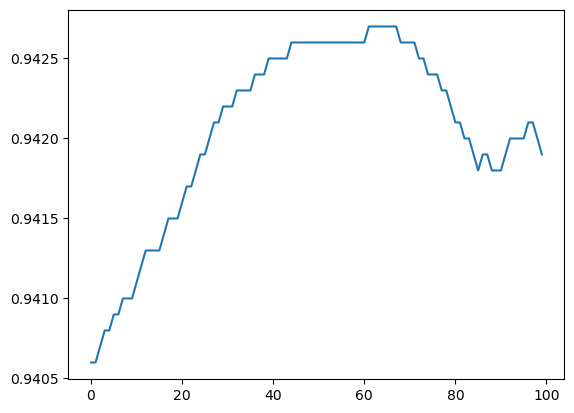

In [87]:
import matplotlib.pyplot as plt
plt.plot(RS)

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err,tr_err-ts_err

(310417392.03, 1284118721.72, -973701329.69)

In [90]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [91]:
modeller(lm)

(310417392.03, 1284118721.72)

# Regulrize

In [183]:
from sklearn.linear_model import Ridge, Lasso
rr = Ridge(alpha=1784.0)
modeller(rr)

(1295342833.83, 1362844720.64)

In [184]:
ls = Lasso()
modeller(ls)

(320794594.11, 1307424140.43)

In [185]:
q = 0.1
alphas = []
for i in range(0,1790):
    q = round(q + 1,2)
    alphas.append(q)

In [186]:
alphas[1700]

1701.1

In [187]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_trr = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)

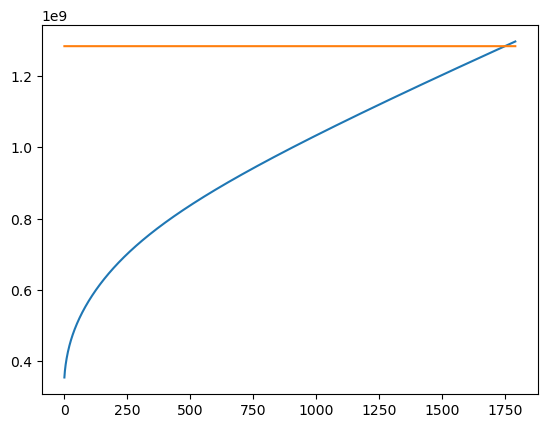

In [188]:
plt.plot(tr)
plt.plot(ts)

In [192]:
from sklearn.model_selection import GridSearchCV
rr = Ridge()
tg = {'alpha':alphas[1700:1790]}

cv = GridSearchCV(rr,tg,scoring='neg_mean_squared_error',cv=5)
cvmodel = cv.fit(Xnew,Y).best_params_
cvmodel

{'alpha': 1701.1}

# Final Model

In [193]:
rr = Ridge(alpha=1701.1)
model = rr.fit(Xnew,Y)

In [194]:
Xnew.columns

Index(['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Fireplaces', 'GarageCars',
       ...
       'Fence_No Fence', 'MiscFeature_Gar2', 'MiscFeature_None',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'SaleType_COD', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Alloca'],
      dtype='object', length=195)

In [196]:
final_df_prd = Xnew_test[Xnew.columns]

In [213]:
pred = model.predict(final_df_prd)

In [214]:
Q = tsd[['Id']]
Q['SalePrice'] = pred
Q

,Id,SalePrice
0,1461,116884.078875
1,1462,173268.882640
2,1463,174415.402468
3,1464,199668.790121
4,1465,197341.809597
...,...,...
1454,2915,86525.298540
1455,2916,97618.399943
1456,2917,173358.699299
1457,2918,133279.264302


In [215]:
trd[['SalePrice']]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1214,185000
1215,175000
1216,266500
1217,142125


In [216]:
Q.to_csv('Desktop.csv')

In [217]:
Q

,Id,SalePrice
0,1461,116884.078875
1,1462,173268.882640
2,1463,174415.402468
3,1464,199668.790121
4,1465,197341.809597
...,...,...
1454,2915,86525.298540
1455,2916,97618.399943
1456,2917,173358.699299
1457,2918,133279.264302
